## **Insurance Attorney Prediction**

The project aims to develop a model that predicts whether an attorney will be involved in a claim based on various claim-related factors. This will help insurance companies optimize their processes, reduce legal costs, and better allocate resources.

Attribute information:

● CASENUM:Numerical Id of the case

● ATTORNEY:Indicates whether an attorney was involved in the claim (1 = Yes, 0 = No)

● CLMSEX:Gender of the claimant (1 = Male, 0 = Female)

● CLMINSUR:Indicates whether the claimant was insured at the time of the accident (1 = Yes, 0 = No)

● SEATBELT:Indicates whether the claimant was wearing a seatbelt at the time of the accident (1 = Yes, 0 = No)

● CLMAGE:Age of the claimant

● LOSS:The financial loss associated with the claim (in unspecified currency)

● Accident_Severity:Damage/Injuries (Minor, Moderate, Severe)

● Claim_Amount_Requested:The initial amount requested by the claimant for their claim (in currency units)

● Claim_Approval_Status:Indicates whether the claim was approved (1) or denied (0)

● Settlement_Amount:The amount ultimately paid to the claimant after settlement (in currency units)

● Policy_Type:Indicates the type of insurance policy held by the claimant

● Driving_Record:Driving record of the claimant, indicating their history of traffic violations or offenses


In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading datasets
df = pd.read_csv('Claimants.csv') 

In [3]:
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,5,0,0.0,1.0,0.0,50.0,2367.86,Severe,4497.19,1,3221.74,Third-Party,Clean
1,3,1,1.0,0.0,0.0,18.0,3746.41,Minor,6216.38,1,6166.17,Comprehensive,Clean
2,66,1,0.0,1.0,0.0,5.0,14282.43,Severe,17978.55,0,13804.61,Comprehensive,Minor Offenses
3,70,0,0.0,1.0,1.0,31.0,519.12,Severe,753.54,1,596.25,Comprehensive,Clean
4,96,1,0.0,1.0,0.0,30.0,1354.31,Minor,2167.42,0,1714.83,Comprehensive,Clean
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,11749.94,Moderate,14992.27,0,13533.51,Comprehensive,Clean
1336,34110,0,1.0,1.0,0.0,46.0,776.62,Moderate,1438.79,0,1178.05,Third-Party,Major Offenses
1337,34113,1,1.0,1.0,0.0,39.0,13261.20,Severe,18106.45,1,16782.44,Third-Party,Minor Offenses
1338,34145,0,1.0,0.0,0.0,8.0,9919.60,Minor,17119.15,1,14315.98,Third-Party,Clean


## EDA( EXPLORATORY DATA ANALYSIS )

In [4]:
# Check the shape of the DataFrame
print(f"\nShape of the DataFrame: {df.shape} (Rows, Columns)")


Shape of the DataFrame: (1340, 13) (Rows, Columns)


In [5]:
print("First 10 rows of the dataset:")
df.head(10)

First 10 rows of the dataset:


,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,5,0,0.0,1.0,0.0,50.0,2367.86,Severe,4497.19,1,3221.74,Third-Party,Clean
1,3,1,1.0,0.0,0.0,18.0,3746.41,Minor,6216.38,1,6166.17,Comprehensive,Clean
2,66,1,0.0,1.0,0.0,5.0,14282.43,Severe,17978.55,0,13804.61,Comprehensive,Minor Offenses
3,70,0,0.0,1.0,1.0,31.0,519.12,Severe,753.54,1,596.25,Comprehensive,Clean
4,96,1,0.0,1.0,0.0,30.0,1354.31,Minor,2167.42,0,1714.83,Comprehensive,Clean
5,97,0,1.0,1.0,0.0,35.0,2504.40,Minor,4553.78,0,3502.43,Third-Party,Minor Offenses
6,10,0,0.0,1.0,0.0,9.0,809.68,Severe,1017.38,0,712.62,Third-Party,Clean
7,36,0,1.0,1.0,0.0,34.0,3013.37,Moderate,4037.99,1,3710.12,Comprehensive,Clean
8,51,1,1.0,1.0,0.0,60.0,6936.94,Severe,11869.31,0,11751.25,Comprehensive,Major Offenses
9,55,1,0.0,1.0,0.0,NaN,4542.14,Severe,8717.78,1,6689.05,Comprehensive,Minor Offenses


In [6]:
print("\nLast 10 rows of the dataset:")
df.tail(10)


Last 10 rows of the dataset:


,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
1330,34011,1,0.0,1.0,0.0,33.0,6956.56,Severe,9640.98,1,7661.99,Comprehensive,Clean
1331,34030,0,1.0,1.0,0.0,3.0,4845.11,Minor,6374.67,0,4571.05,Comprehensive,Minor Offenses
1332,34066,1,1.0,1.0,0.0,9.0,8370.08,Severe,12167.97,1,11315.70,Third-Party,Major Offenses
1333,34089,1,0.0,1.0,0.0,49.0,4411.81,Moderate,6296.14,0,5733.47,Third-Party,Minor Offenses
1334,34104,1,1.0,1.0,0.0,16.0,3414.72,Severe,6348.42,0,5074.96,Comprehensive,Minor Offenses
1335,34100,1,0.0,1.0,0.0,NaN,11749.94,Moderate,14992.27,0,13533.51,Comprehensive,Clean
1336,34110,0,1.0,1.0,0.0,46.0,776.62,Moderate,1438.79,0,1178.05,Third-Party,Major Offenses
1337,34113,1,1.0,1.0,0.0,39.0,13261.20,Severe,18106.45,1,16782.44,Third-Party,Minor Offenses
1338,34145,0,1.0,0.0,0.0,8.0,9919.60,Minor,17119.15,1,14315.98,Third-Party,Clean
1339,34153,1,1.0,1.0,0.0,30.0,10548.36,Moderate,13522.19,1,11138.01,Third-Party,Clean


## DATATYPES

In [7]:
# Check the data types of each column
print("\nData types of each column:")
df.dtypes


Data types of each column:


CASENUM                     int64
ATTORNEY                    int64
CLMSEX                    float64
CLMINSUR                  float64
SEATBELT                  float64
CLMAGE                    float64
LOSS                      float64
Accident_Severity          object
Claim_Amount_Requested    float64
Claim_Approval_Status       int64
Settlement_Amount         float64
Policy_Type                object
Driving_Record             object
dtype: object

In [8]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CASENUM                 1340 non-null   int64  
 1   ATTORNEY                1340 non-null   int64  
 2   CLMSEX                  1328 non-null   float64
 3   CLMINSUR                1299 non-null   float64
 4   SEATBELT                1292 non-null   float64
 5   CLMAGE                  1151 non-null   float64
 6   LOSS                    1340 non-null   float64
 7   Accident_Severity       1340 non-null   object 
 8   Claim_Amount_Requested  1340 non-null   float64
 9   Claim_Approval_Status   1340 non-null   int64  
 10  Settlement_Amount       1340 non-null   float64
 11  Policy_Type             1340 non-null   object 
 12  Driving_Record          1340 non-null   object 
dtypes: float64(7), int64(3), object(3)
memory usage: 136.2+ KB


In [9]:
df.columns

Index(['CASENUM', 'ATTORNEY', 'CLMSEX', 'CLMINSUR', 'SEATBELT', 'CLMAGE',
       'LOSS', 'Accident_Severity', 'Claim_Amount_Requested',
       'Claim_Approval_Status', 'Settlement_Amount', 'Policy_Type',
       'Driving_Record'],
      dtype='object')

In [10]:
print("\nDescriptive statistics of the dataset:")
df.describe()


Descriptive statistics of the dataset:


,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount
count,1340.000000,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,11202.001493,0.488806,0.558735,0.907621,0.017028,28.414422,6684.598149,10341.430276,0.480597,8787.805463
std,9512.750796,0.500061,0.496725,0.289671,0.129425,20.304451,3785.039412,5678.906970,0.499810,4942.577454
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,296.410000,562.760000,0.000000,424.520000
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,9.000000,3414.052500,5308.890000,0.000000,4389.100000
50%,8756.500000,0.000000,1.000000,1.000000,0.000000,30.000000,6781.575000,10571.250000,0.000000,8898.245000
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,43.000000,9708.882500,15291.665000,1.000000,12646.157500
max,34153.000000,1.000000,1.000000,1.000000,1.000000,95.000000,15794.810000,19988.570000,1.000000,19566.510000


In [11]:
df.duplicated().sum() 

0

In [12]:
# Check for duplicates
df[df.duplicated()]

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record


In [13]:
#Finding null values
df.isna().sum() 

CASENUM                     0
ATTORNEY                    0
CLMSEX                     12
CLMINSUR                   41
SEATBELT                   48
CLMAGE                    189
LOSS                        0
Accident_Severity           0
Claim_Amount_Requested      0
Claim_Approval_Status       0
Settlement_Amount           0
Policy_Type                 0
Driving_Record              0
dtype: int64

<Axes: >

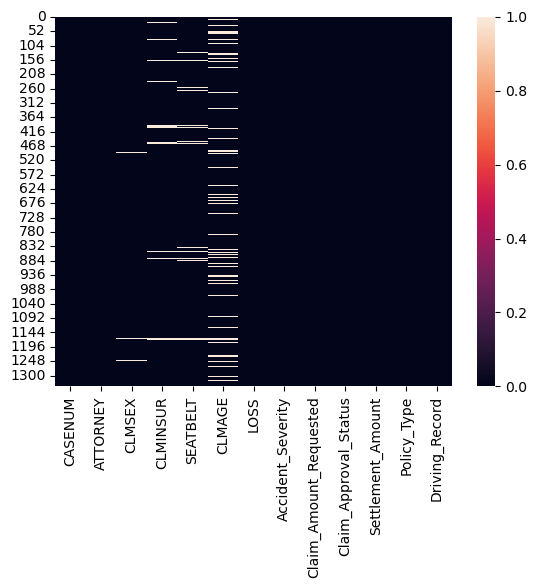

In [14]:
# visualize the missing values:-
sns.heatmap(df.isna()) 

In [15]:
# Dropping null rows CLMSEX,CLMINSUR,SEATBELT as the null values are less than 5% of total data
df.dropna(subset=['CLMSEX'], inplace=True)
df.dropna(subset=['CLMINSUR'], inplace=True)
df.dropna(subset=['SEATBELT'], inplace=True)

In [16]:
# fill the null values in CLMAGE with its mean

# Calculate the mean of the 'CLMAGE' column, ignoring NaN values
mean_age = df['CLMAGE'].mean()

# Fill NaN values in the 'Age' column with the calculated mean
df['CLMAGE'].fillna(mean_age, inplace=True)

# Verify that there are no more NaN values in the 'Age' column
print(df['CLMAGE'].isnull().sum())

0


In [17]:
df.isna().sum()  

CASENUM                   0
ATTORNEY                  0
CLMSEX                    0
CLMINSUR                  0
SEATBELT                  0
CLMAGE                    0
LOSS                      0
Accident_Severity         0
Claim_Amount_Requested    0
Claim_Approval_Status     0
Settlement_Amount         0
Policy_Type               0
Driving_Record            0
dtype: int64

In [18]:
df=df.drop('CASENUM',axis=1)
df.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,0,0.0,1.0,0.0,50.0,2367.86,Severe,4497.19,1,3221.74,Third-Party,Clean
1,1,1.0,0.0,0.0,18.0,3746.41,Minor,6216.38,1,6166.17,Comprehensive,Clean
2,1,0.0,1.0,0.0,5.0,14282.43,Severe,17978.55,0,13804.61,Comprehensive,Minor Offenses
3,0,0.0,1.0,1.0,31.0,519.12,Severe,753.54,1,596.25,Comprehensive,Clean
4,1,0.0,1.0,0.0,30.0,1354.31,Minor,2167.42,0,1714.83,Comprehensive,Clean


## DATA VISUALIZATION

### HISTOGRAM FOR SKEWNESS

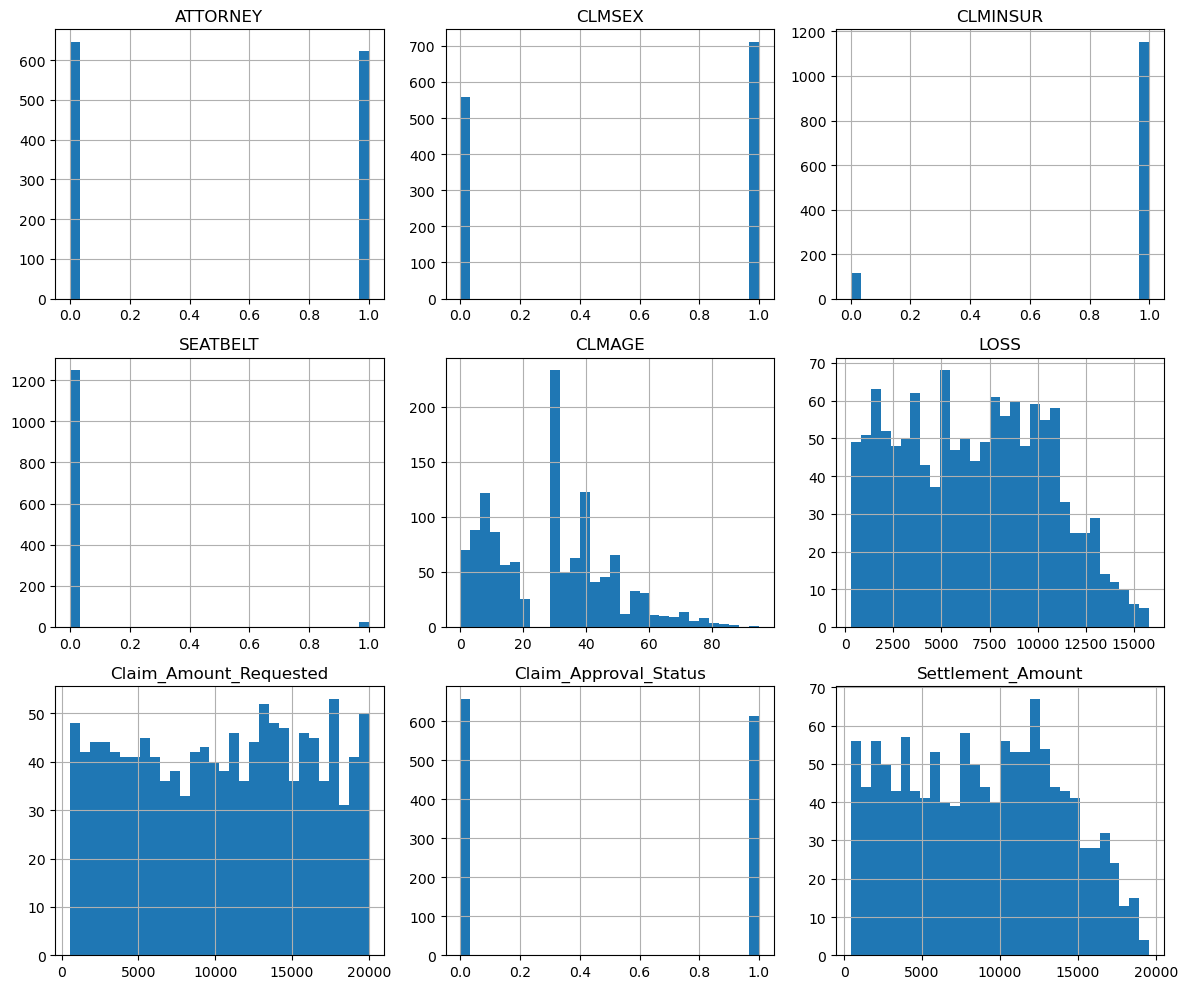

In [19]:
# Visualize distributions using histograms
df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

### PAIRPLOT :- A COMBINATION OF HISTOGRAM AND SCATTER PLOT

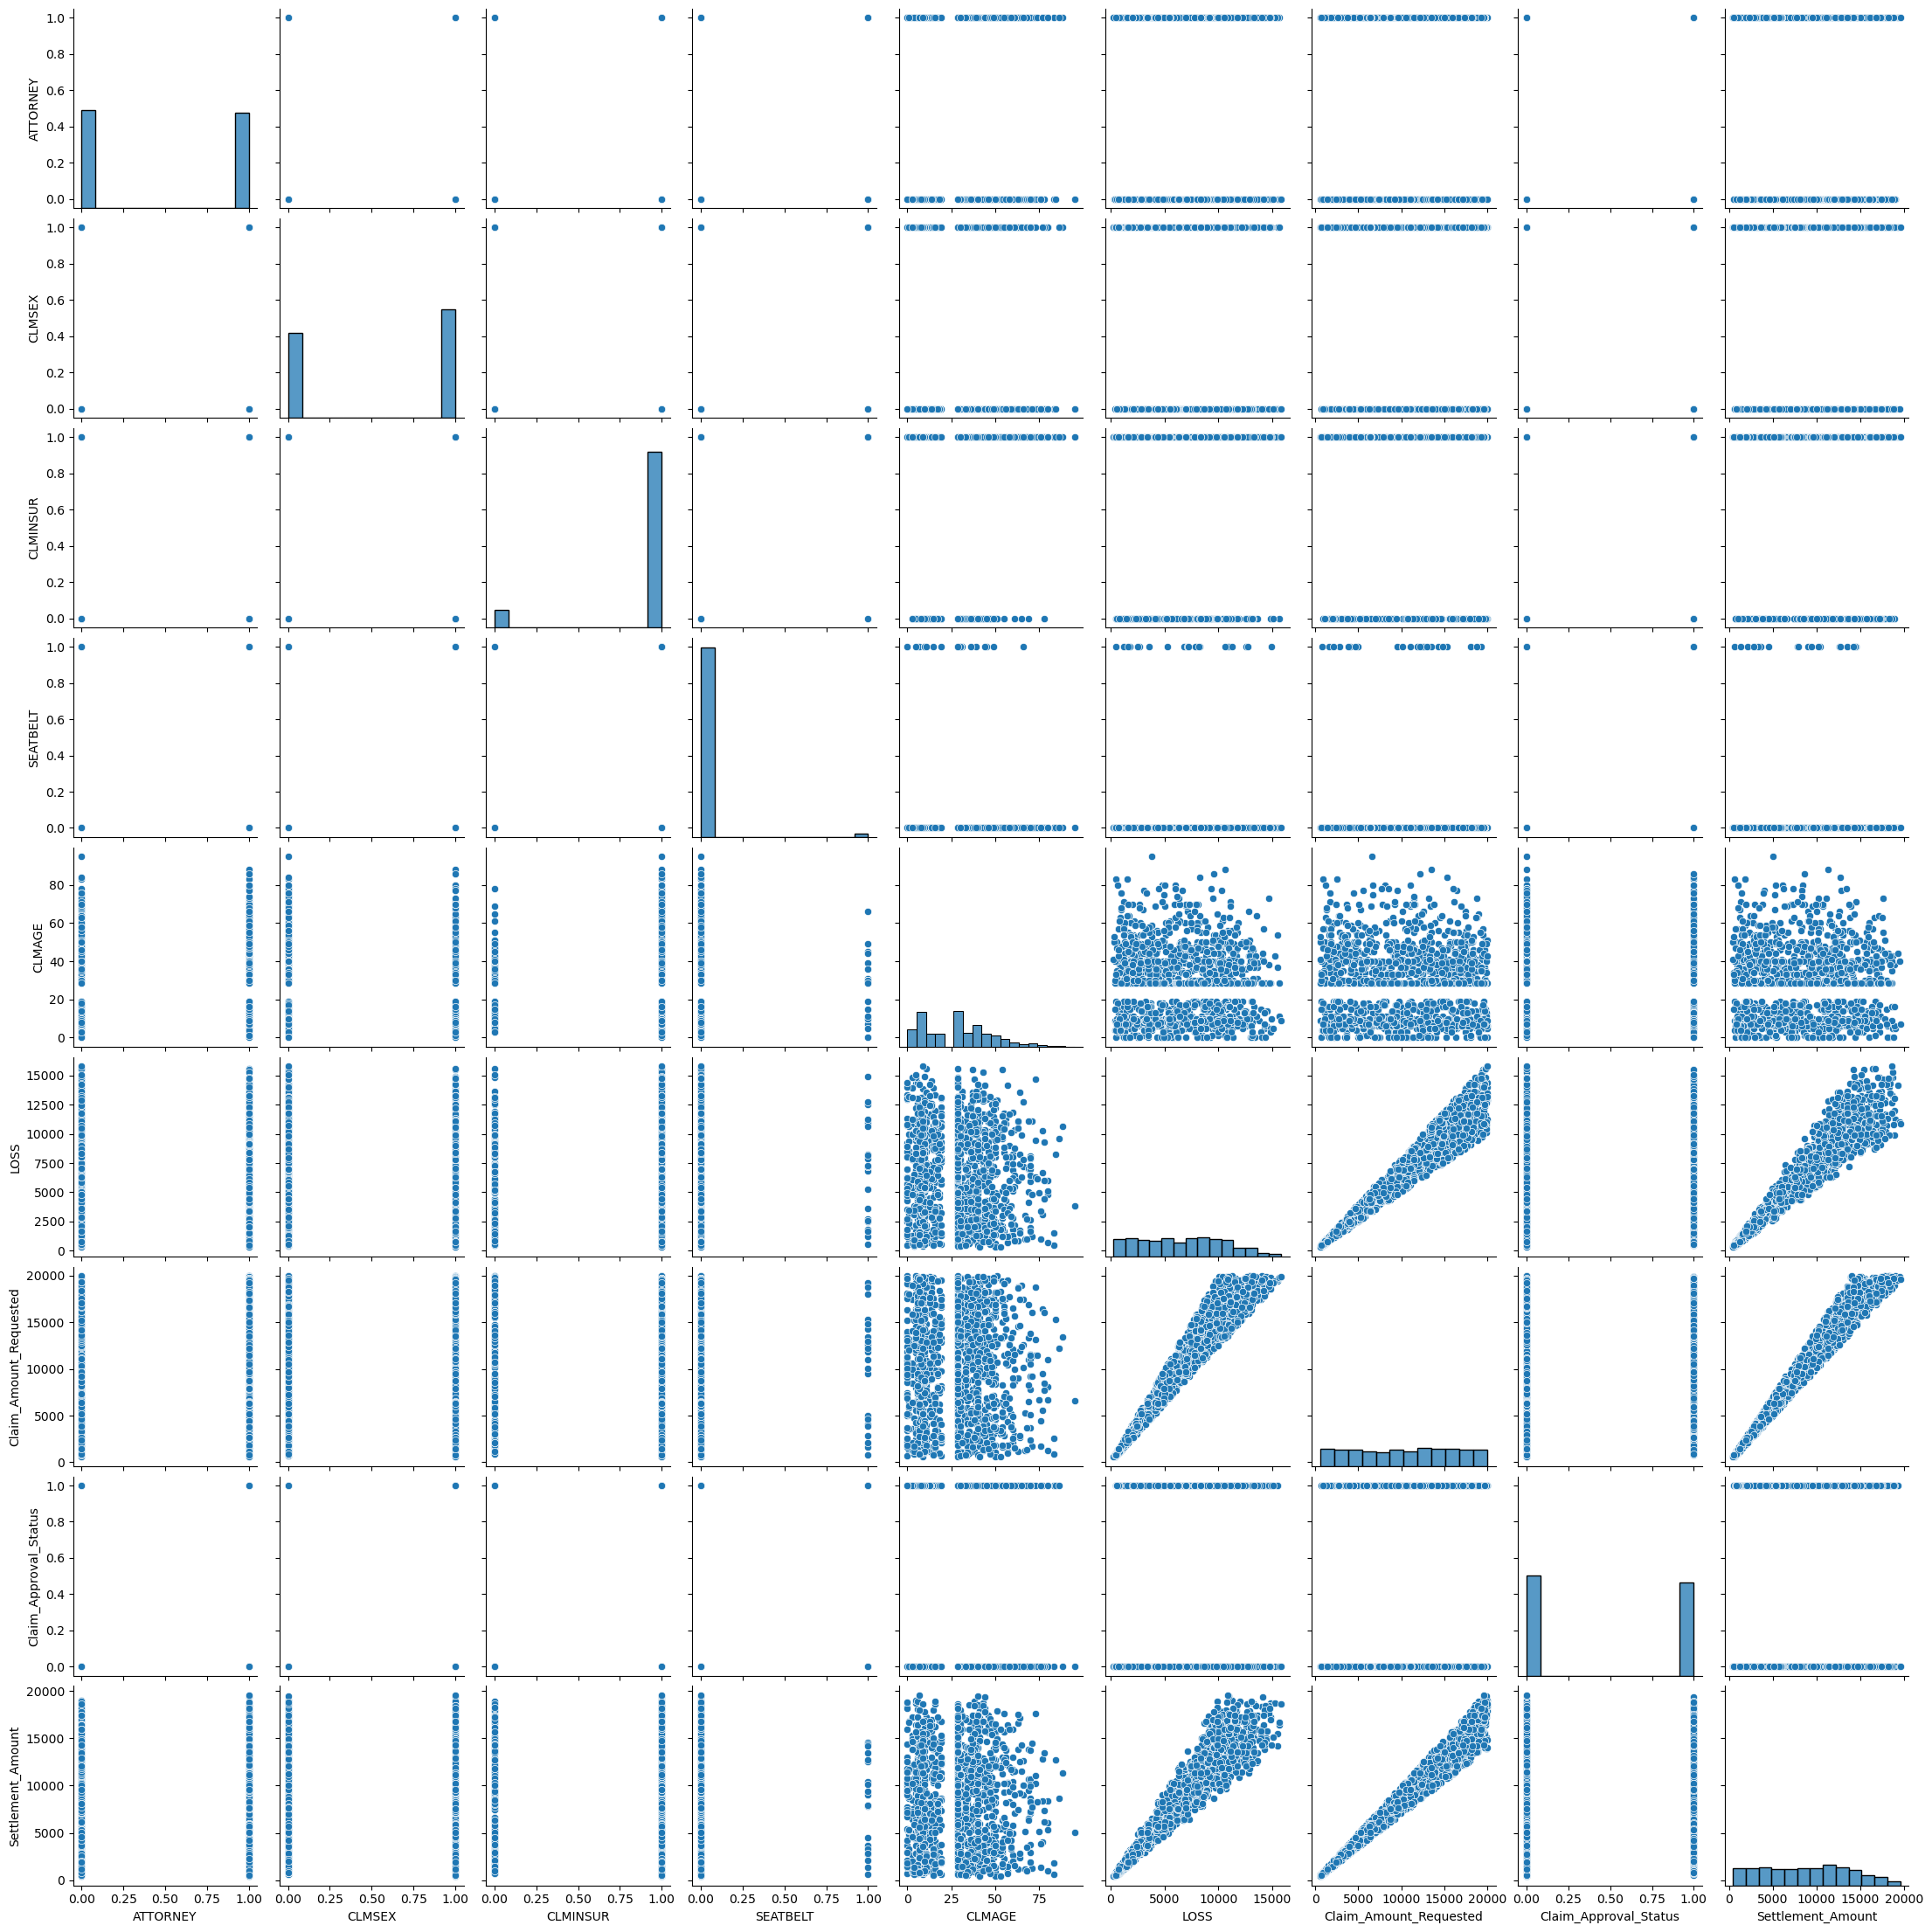

In [20]:
sns.pairplot(df)
plt.show()# for all features

### SCATTER PLOT

Text(0, 0.5, 'Claim_Amount_Requested')

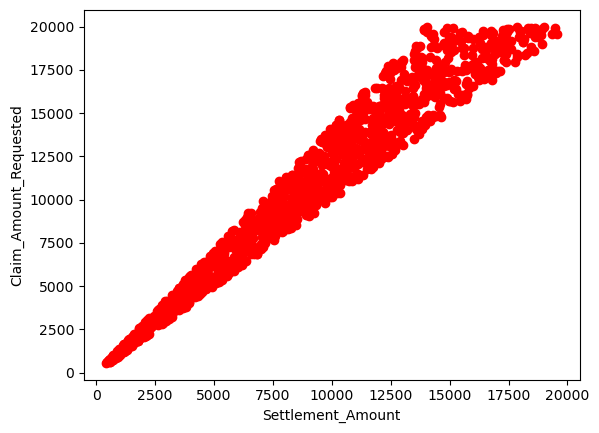

In [21]:
plt.scatter(df['Settlement_Amount'],df['Claim_Amount_Requested'],color='red')  
plt.xlabel('Settlement_Amount')
plt.ylabel('Claim_Amount_Requested')
# a strong neg correlation btwn them

Text(0, 0.5, 'LOSS')

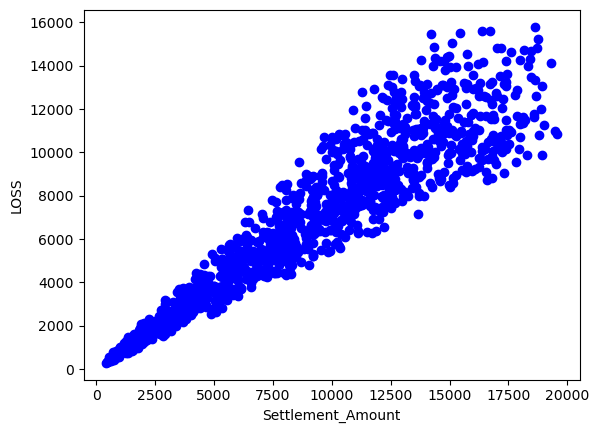

In [22]:
plt.scatter(df['Settlement_Amount'],df['LOSS'],color='blue')   
plt.xlabel('Settlement_Amount')
plt.ylabel('LOSS')

### LINE PLOT

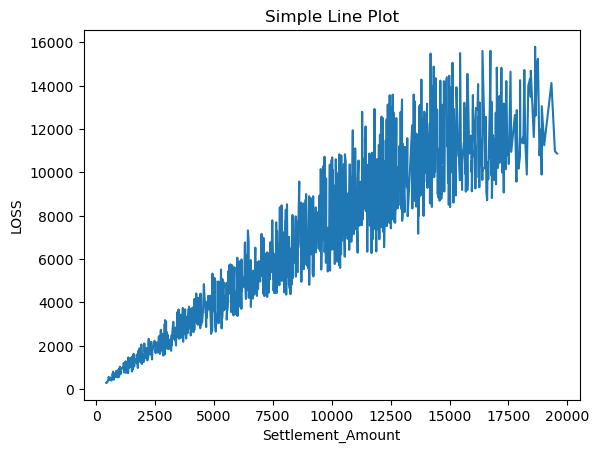

In [23]:
sns.lineplot(x='Settlement_Amount', y='LOSS', data=df)
plt.title('Simple Line Plot')
plt.show()

### OUTLIER DETECTION USING BOXPLOT

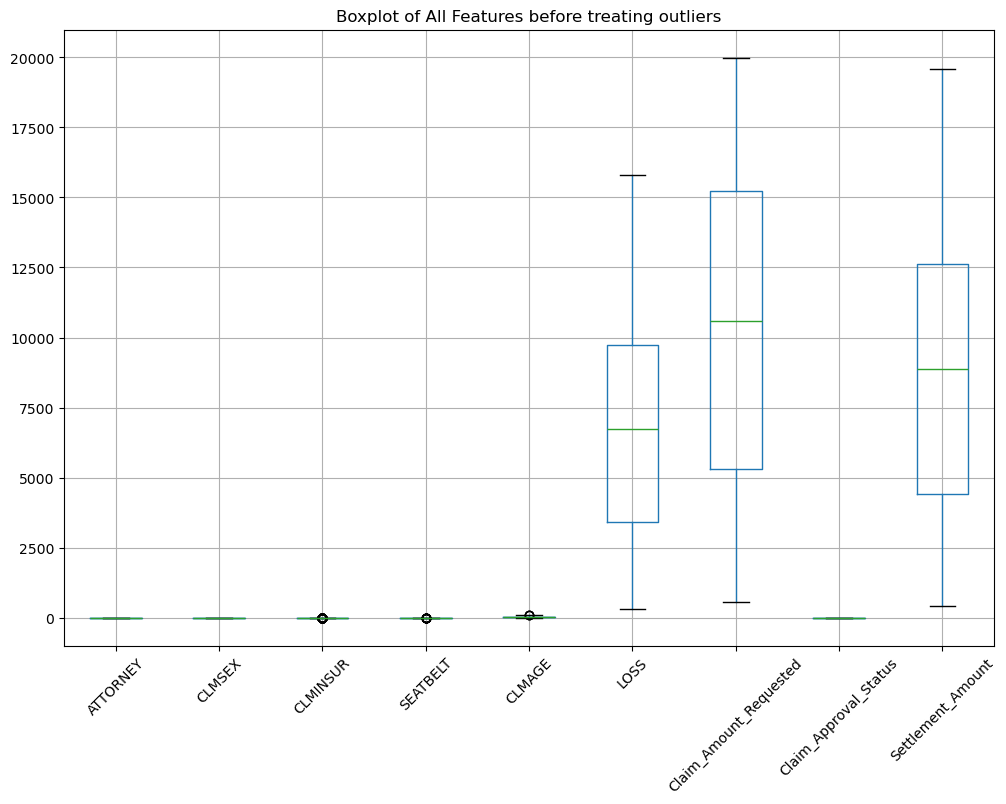

In [24]:
# Visualize outliers using boxplots
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title("Boxplot of All Features before treating outliers")
plt.xticks(rotation=45)
plt.show()

In [25]:
df

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,0,0.0,1.0,0.0,50.000000,2367.86,Severe,4497.19,1,3221.74,Third-Party,Clean
1,1,1.0,0.0,0.0,18.000000,3746.41,Minor,6216.38,1,6166.17,Comprehensive,Clean
2,1,0.0,1.0,0.0,5.000000,14282.43,Severe,17978.55,0,13804.61,Comprehensive,Minor Offenses
3,0,0.0,1.0,1.0,31.000000,519.12,Severe,753.54,1,596.25,Comprehensive,Clean
4,1,0.0,1.0,0.0,30.000000,1354.31,Minor,2167.42,0,1714.83,Comprehensive,Clean
...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,28.587591,11749.94,Moderate,14992.27,0,13533.51,Comprehensive,Clean
1336,0,1.0,1.0,0.0,46.000000,776.62,Moderate,1438.79,0,1178.05,Third-Party,Major Offenses
1337,1,1.0,1.0,0.0,39.000000,13261.20,Severe,18106.45,1,16782.44,Third-Party,Minor Offenses
1338,0,1.0,0.0,0.0,8.000000,9919.60,Minor,17119.15,1,14315.98,Third-Party,Clean


### OUTLIER'S TREATMENT

In [26]:
# now to treat the outliers we have :- 
# capping :- Replacing outlier values 
# in capping all outlier values will be replaced by upper extreme or lower extreme values 
def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)   # lower quartile
    q3 = data[colname].quantile(0.75)   # upper quartile
    iqr = q3-q1   # calculating inter quartile range 

    upper_extreme = q3 + (1.5*iqr)
    lower_extreme = q1 - (1.5*iqr)

    return print('lower_extreme:-',lower_extreme,', upper_extreme:-',upper_extreme,', q1:-',q1,', q3:-',q3)

In [27]:
""" capping outliers only for 'CLMAGE' as in other 2 columns the data is categorical with 2 discrete variables, 
1 being less compared to other so treated as an outlier. """
outlier_detection(df,'CLMAGE')

lower_extreme:- -35.0 , upper_extreme:- 85.0 , q1:- 10.0 , q3:- 40.0


In [28]:
df.loc[df['CLMAGE']>85,'CLMAGE'] = 85
df.loc[df['CLMAGE']<-35,'CLMAGE'] = -35

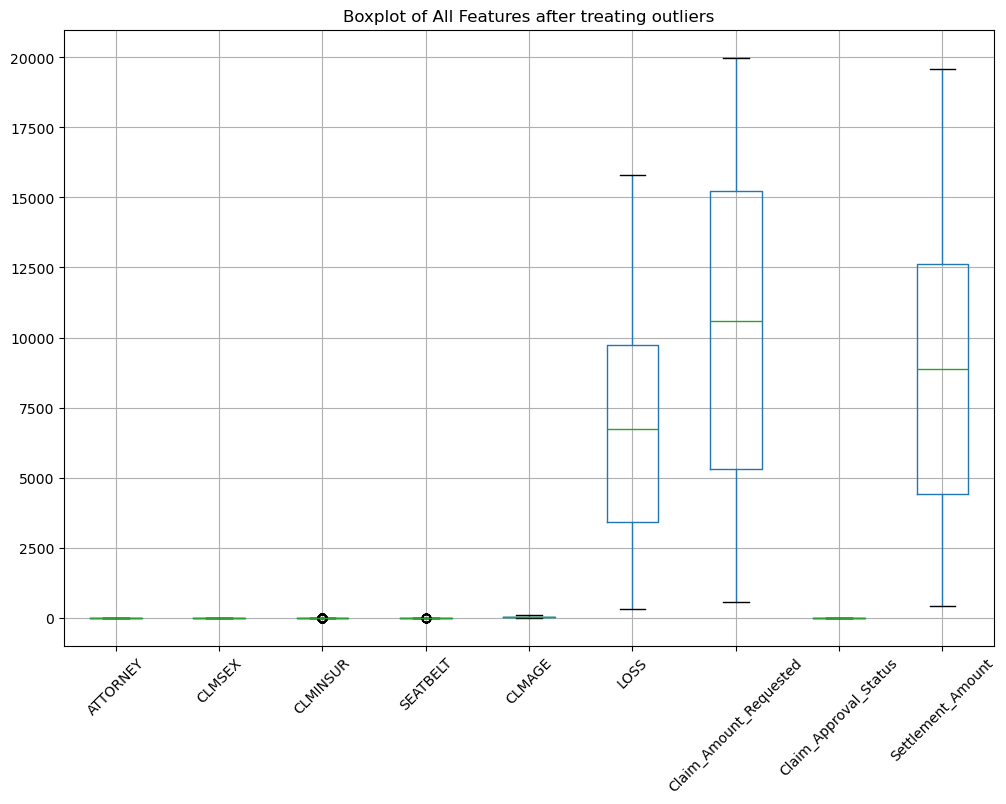

In [29]:
# Visualize outliers using boxplots
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title("Boxplot of All Features after treating outliers")
plt.xticks(rotation=45)
plt.show()   # all outliers are treated and , now no outliers are present , as can be seen using boxplot

In [30]:
df

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,0,0.0,1.0,0.0,50.000000,2367.86,Severe,4497.19,1,3221.74,Third-Party,Clean
1,1,1.0,0.0,0.0,18.000000,3746.41,Minor,6216.38,1,6166.17,Comprehensive,Clean
2,1,0.0,1.0,0.0,5.000000,14282.43,Severe,17978.55,0,13804.61,Comprehensive,Minor Offenses
3,0,0.0,1.0,1.0,31.000000,519.12,Severe,753.54,1,596.25,Comprehensive,Clean
4,1,0.0,1.0,0.0,30.000000,1354.31,Minor,2167.42,0,1714.83,Comprehensive,Clean
...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,28.587591,11749.94,Moderate,14992.27,0,13533.51,Comprehensive,Clean
1336,0,1.0,1.0,0.0,46.000000,776.62,Moderate,1438.79,0,1178.05,Third-Party,Major Offenses
1337,1,1.0,1.0,0.0,39.000000,13261.20,Severe,18106.45,1,16782.44,Third-Party,Minor Offenses
1338,0,1.0,0.0,0.0,8.000000,9919.60,Minor,17119.15,1,14315.98,Third-Party,Clean


In [31]:
#Splitting numerical and categorical variables
df_num=df.drop(df.columns[[6,10,11]],axis=1)
df_num

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount
0,0,0.0,1.0,0.0,50.000000,2367.86,4497.19,1,3221.74
1,1,1.0,0.0,0.0,18.000000,3746.41,6216.38,1,6166.17
2,1,0.0,1.0,0.0,5.000000,14282.43,17978.55,0,13804.61
3,0,0.0,1.0,1.0,31.000000,519.12,753.54,1,596.25
4,1,0.0,1.0,0.0,30.000000,1354.31,2167.42,0,1714.83
...,...,...,...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,28.587591,11749.94,14992.27,0,13533.51
1336,0,1.0,1.0,0.0,46.000000,776.62,1438.79,0,1178.05
1337,1,1.0,1.0,0.0,39.000000,13261.20,18106.45,1,16782.44
1338,0,1.0,0.0,0.0,8.000000,9919.60,17119.15,1,14315.98


In [32]:
df_cat=df.drop(df.columns[[0,1,2,3,4,5,7,8,9]],axis=1)
df_cat

,Accident_Severity,Policy_Type,Driving_Record
0,Severe,Third-Party,Clean
1,Minor,Comprehensive,Clean
2,Severe,Comprehensive,Minor Offenses
3,Severe,Comprehensive,Clean
4,Minor,Comprehensive,Clean
...,...,...,...
1335,Moderate,Comprehensive,Clean
1336,Moderate,Third-Party,Major Offenses
1337,Severe,Third-Party,Minor Offenses
1338,Minor,Third-Party,Clean


### CORRELATION MATRIX AND HEATMAP

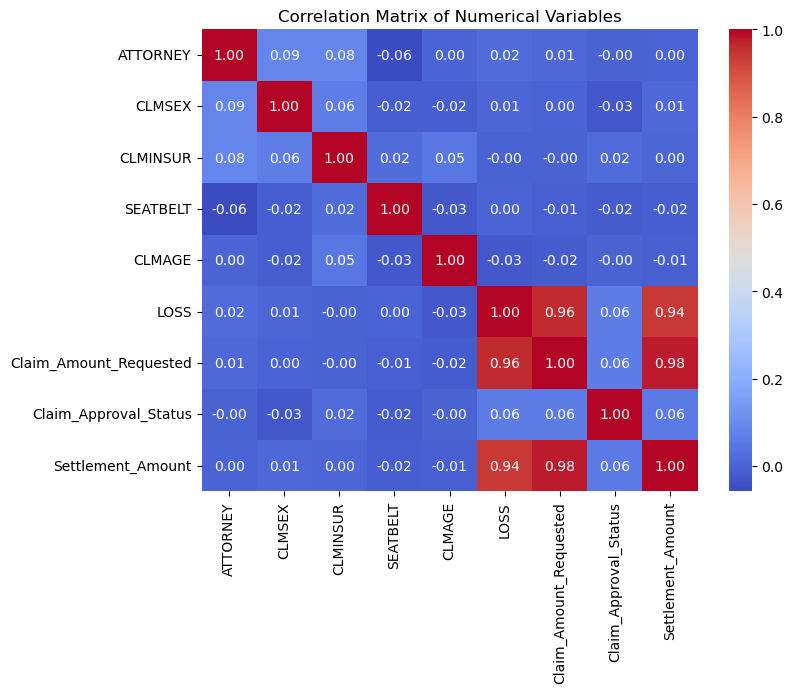

In [33]:
# plot the correlation matrix between all the numerical variables

# Create the correlation matrix
correlation_matrix = df_num.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

#### High Multicollinearity Between LOSS, Claim_Amount_Requested, and Settlement_Amount

In [34]:
# VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF scores
vif_data = pd.DataFrame()
vif_data["Feature"] = df_num.columns
vif_data["VIF"] = [variance_inflation_factor(df_num.values, i) for i in range(df_num.shape[1])]

print(vif_data)

                  Feature         VIF
0                ATTORNEY    1.960998
1                  CLMSEX    2.190581
2                CLMINSUR    5.842123
3                SEATBELT    1.024219
4                  CLMAGE    2.929676
5                    LOSS   54.558673
6  Claim_Amount_Requested  158.325202
7   Claim_Approval_Status    1.868805
8       Settlement_Amount  101.891153


In [35]:
# label encode Accident_Severity, Policy_Type and Driving_Record variables

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

for column in df_cat.columns:
  df_cat[column] = le.fit_transform(df_cat[column])

# Print the updated DataFrame
df_cat.head()

,Accident_Severity,Policy_Type,Driving_Record
0,2,1,0
1,0,0,0
2,2,0,2
3,2,0,0
4,0,0,0


In [36]:
# converting float datatype to int
df_num[['CLMSEX', 'CLMINSUR', 'SEATBELT','CLMAGE']] = df_num[['CLMSEX', 'CLMINSUR', 'SEATBELT','CLMAGE']].astype(int)

In [37]:
# combine numerical and categorical variables
df_feat=pd.concat((df_num,df_cat),axis=1)
df_feat.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Accident_Severity,Policy_Type,Driving_Record
0,0,0,1,0,50,2367.86,4497.19,1,3221.74,2,1,0
1,1,1,0,0,18,3746.41,6216.38,1,6166.17,0,0,0
2,1,0,1,0,5,14282.43,17978.55,0,13804.61,2,0,2
3,0,0,1,1,31,519.12,753.54,1,596.25,2,0,0
4,1,0,1,0,30,1354.31,2167.42,0,1714.83,0,0,0


In [38]:
# ANOVA test (check relationship between numerical variables and discrete target)
from sklearn.feature_selection import f_classif
numerical_features = ['CLMAGE','LOSS','Claim_Amount_Requested','Settlement_Amount']
# Perform ANOVA F-test
f_values, p_values = f_classif(df_feat[numerical_features], df_feat['ATTORNEY'])

# Create DataFrame
anova_results = pd.DataFrame({'Feature': numerical_features, 'F-Value': f_values, 'P-Value': p_values})
anova_results.sort_values(by='F-Value', ascending=False)

,Feature,F-Value,P-Value
1,LOSS,0.385783,0.534636
2,Claim_Amount_Requested,0.081638,0.775137
3,Settlement_Amount,0.017954,0.893431
0,CLMAGE,0.000091,0.992395


In [39]:
# Chi-square test (check relationship between discrete variables and discrete target)
from sklearn.feature_selection import chi2
import pandas as pd

# Select categorical features 
categorical_features = ['CLMSEX', 'CLMINSUR', 'SEATBELT', 'Claim_Approval_Status', 
                        'Accident_Severity', 'Policy_Type', 'Driving_Record'] 

# Perform Chi-Square test on features
chi_scores, p_values = chi2(df_feat[categorical_features], df_feat['ATTORNEY'])  # Replace 'ATTORNEY' if needed

# Store results in a DataFrame
chi_results = pd.DataFrame({'Feature': categorical_features, 
                            'Chi-Square Score': chi_scores, 
                            'P-Value': p_values})

# Sort results by Chi-Square Score
chi_results = chi_results.sort_values(by='Chi-Square Score', ascending=False)

# Display results
print(chi_results)

                 Feature  Chi-Square Score   P-Value
2               SEATBELT          4.221666  0.039911
0                 CLMSEX          4.070127  0.043648
1               CLMINSUR          0.837870  0.360007
4      Accident_Severity          0.837132  0.360218
6         Driving_Record          0.764968  0.381778
5            Policy_Type          0.136985  0.711297
3  Claim_Approval_Status          0.005730  0.939662


## FEATURE ENGINEERING

In [40]:
# New feature from Settlement_Amount and Claim_Amount_Requested
df_feat['Settlement_Ratio'] = df_feat['Settlement_Amount'] / df_feat['Claim_Amount_Requested']
df_feat.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Accident_Severity,Policy_Type,Driving_Record,Settlement_Ratio
0,0,0,1,0,50,2367.86,4497.19,1,3221.74,2,1,0,0.716390
1,1,1,0,0,18,3746.41,6216.38,1,6166.17,0,0,0,0.991923
2,1,0,1,0,5,14282.43,17978.55,0,13804.61,2,0,2,0.767838
3,0,0,1,1,31,519.12,753.54,1,596.25,2,0,0,0.791265
4,1,0,1,0,30,1354.31,2167.42,0,1714.83,0,0,0,0.791185


In [41]:
# DROPPING Claim_Amount_Requested,Settlement_Amount,Policy_Type,Driving_Record,Claim_Approval_Status          
df_feat=df_feat.drop(df[['Claim_Amount_Requested','Settlement_Amount','Policy_Type','Driving_Record','Claim_Approval_Status']],axis=1)
df_feat.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Settlement_Ratio
0,0,0,1,0,50,2367.86,2,0.716390
1,1,1,0,0,18,3746.41,0,0.991923
2,1,0,1,0,5,14282.43,2,0.767838
3,0,0,1,1,31,519.12,2,0.791265
4,1,0,1,0,30,1354.31,0,0.791185


## DATA TRANSFORMATION

In [42]:
df_trans=df_feat
df_trans.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Settlement_Ratio
0,0,0,1,0,50,2367.86,2,0.716390
1,1,1,0,0,18,3746.41,0,0.991923
2,1,0,1,0,5,14282.43,2,0.767838
3,0,0,1,1,31,519.12,2,0.791265
4,1,0,1,0,30,1354.31,0,0.791185


In [43]:
# Standardize CLMAGE,LOSS,Settlement_Ratio variables

from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the 'CLMAGE', 'LOSS', and 'Settlement_Ratio' columns
df_trans[['CLMAGE', 'LOSS','Settlement_Ratio']] = scaler.fit_transform(df_trans[['CLMAGE', 'LOSS','Settlement_Ratio']])

# Print the updated DataFrame
df_trans.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Settlement_Ratio
0,0,0,1,0,0.588235,0.133656,2,0.054038
1,1,1,0,0,0.211765,0.222604,0,0.973489
2,1,0,1,0,0.058824,0.902417,2,0.225720
3,0,0,1,1,0.364706,0.014370,2,0.303897
4,1,0,1,0,0.352941,0.068259,0,0.303629


## DATA PARTITION 

In [44]:
# Defining X and Y
Y = df_trans["ATTORNEY"]
X = df_trans.drop(df_trans[['ATTORNEY']],axis=1)
X.head()

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Settlement_Ratio
0,0,1,0,0.588235,0.133656,2,0.054038
1,1,0,0,0.211765,0.222604,0,0.973489
2,0,1,0,0.058824,0.902417,2,0.225720
3,0,1,1,0.364706,0.014370,2,0.303897
4,0,1,0,0.352941,0.068259,0,0.303629


In [45]:
Y.head()

0    0
1    1
2    1
3    0
4    1
Name: ATTORNEY, dtype: int64

## MODEL FITTING AND MODEL EVALUATION

## **MODEL 1 - LOGISTIC REGRESSION**

In [46]:
# data partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.3,random_state=100)

df.shape
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(888, 7)
(381, 7)
(888,)
(381,)


In [47]:
# model fitting
import numpy as np
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression()
model_1.fit(X_train,Y_train)
Y_pred_train = model_1.predict(X_train)
Y_pred_test = model_1.predict(X_test)

In [48]:
#Evaluating training and test accuracies
from sklearn.metrics import  accuracy_score
traningscore = accuracy_score(Y_train,Y_pred_train)
print("training accuracy score:", np.round(traningscore,2))

testscore = accuracy_score(Y_test,Y_pred_test)
print("test accuracy score:", np.round(testscore,2))

training accuracy score: 0.54
test accuracy score: 0.55


In [49]:
### CROSS VALIDATION

training_acc=[]
test_acc=[]
for i in range (1,501):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.3,random_state=i)
    model_1 = LogisticRegression()
    model_1.fit(X_train,Y_train)
    Y_pred_train = model_1.predict(X_train)
    Y_pred_test = model_1.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("cross validation training accuracy:",np.round(np.mean(training_acc),2))
print("cross validation test accuracy:",np.round(np.mean(test_acc),2))

cross validation training accuracy: 0.56
cross validation test accuracy: 0.54


In [50]:
# CLASSIFICATION REPORT
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.58      0.53      0.55       196
           1       0.54      0.59      0.57       185

    accuracy                           0.56       381
   macro avg       0.56      0.56      0.56       381
weighted avg       0.56      0.56      0.56       381



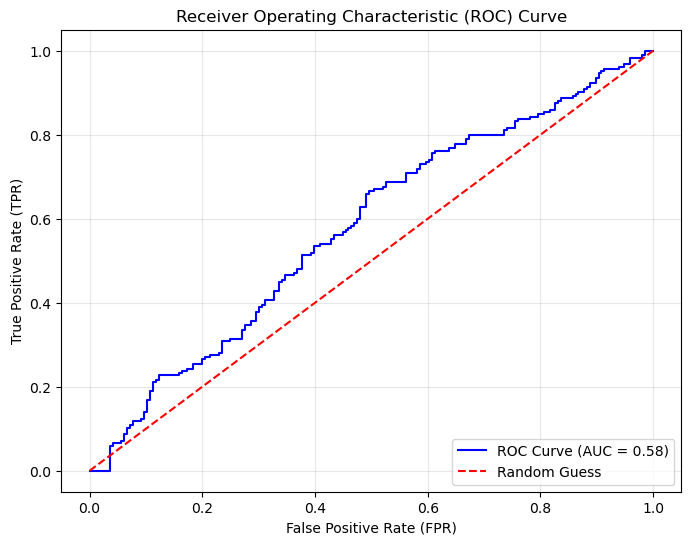

In [51]:
# Plotting the ROC curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class
Y_pred_test = model_1.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_test)

# Compute the AUC score
auc_score = roc_auc_score(Y_test, Y_pred_test)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guess')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [52]:
## Lasso (L1) Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

training_acc_lasso = []
test_acc_lasso = []

for i in range(1, 501):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=i)
    
    model_lasso = LogisticRegression(penalty='l1', solver='liblinear')  # L1 Regularization
    model_lasso.fit(X_train, Y_train)
    
    Y_pred_train = model_lasso.predict(X_train)
    Y_pred_test = model_lasso.predict(X_test)
    
    training_acc_lasso.append(accuracy_score(Y_train, Y_pred_train))
    test_acc_lasso.append(accuracy_score(Y_test, Y_pred_test))

print("Lasso Regression - Cross Validation Training Accuracy:", np.round(np.mean(training_acc_lasso), 2))
print("Lasso Regression - Cross Validation Test Accuracy:", np.round(np.mean(test_acc_lasso), 2))


Lasso Regression - Cross Validation Training Accuracy: 0.55
Lasso Regression - Cross Validation Test Accuracy: 0.54


In [53]:
# CLASSIFICATION REPORT
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.58      0.54      0.56       196
           1       0.54      0.58      0.56       185

    accuracy                           0.56       381
   macro avg       0.56      0.56      0.56       381
weighted avg       0.56      0.56      0.56       381



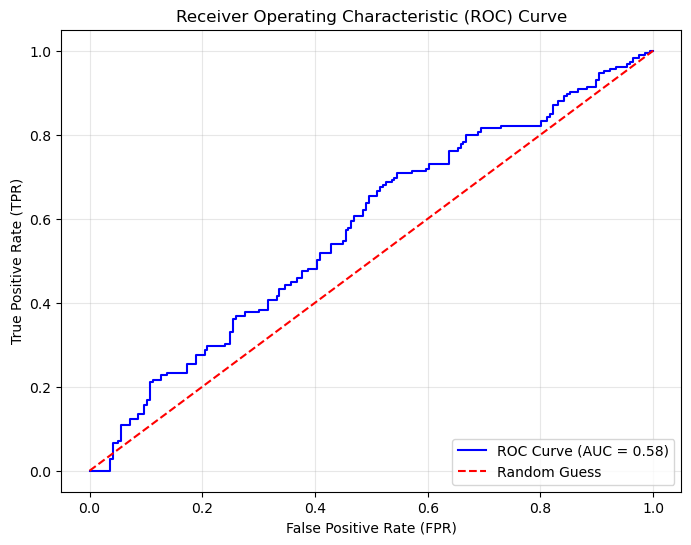

In [54]:
# Plotting the ROC curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class
Y_pred_test = model_lasso.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_test)

# Compute the AUC score
auc_score = roc_auc_score(Y_test, Y_pred_test)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guess')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [55]:
## Ridge (L2) Logistic Regression

training_acc_ridge = []
test_acc_ridge = []

for i in range(1, 501):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=i)
    
    model_ridge = LogisticRegression(penalty='l2', solver='liblinear')  # L2 Regularization
    model_ridge.fit(X_train, Y_train)
    
    Y_pred_train = model_ridge.predict(X_train)
    Y_pred_test = model_ridge.predict(X_test)
    
    training_acc_ridge.append(accuracy_score(Y_train, Y_pred_train))
    test_acc_ridge.append(accuracy_score(Y_test, Y_pred_test))

print("Ridge Regression - Cross Validation Training Accuracy:", np.round(np.mean(training_acc_ridge), 2))
print("Ridge Regression - Cross Validation Test Accuracy:", np.round(np.mean(test_acc_ridge), 2))


Ridge Regression - Cross Validation Training Accuracy: 0.56
Ridge Regression - Cross Validation Test Accuracy: 0.54


In [56]:
# CLASSIFICATION REPORT
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.58      0.53      0.55       196
           1       0.54      0.59      0.56       185

    accuracy                           0.56       381
   macro avg       0.56      0.56      0.56       381
weighted avg       0.56      0.56      0.56       381



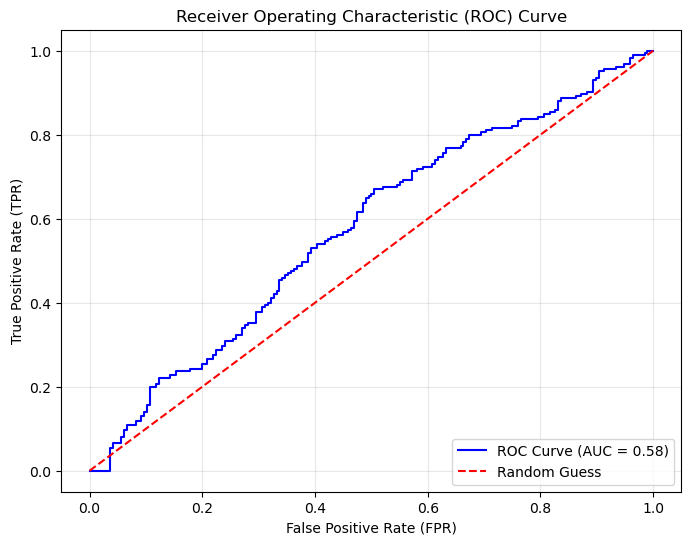

In [57]:
# Plotting the ROC curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class
Y_pred_test = model_ridge.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_test)

# Compute the AUC score
auc_score = roc_auc_score(Y_test, Y_pred_test)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guess')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

## **MODEL 2 - KNN CLASSIFIER**

In [58]:
# data partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.3,random_state=100)

df.shape
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(888, 7)
(381, 7)
(888,)
(381,)


In [59]:
# model fitting
from sklearn.neighbors import KNeighborsClassifier
model_2 = KNeighborsClassifier(n_neighbors=5)
model_2.fit(X_train,Y_train)
Y_pred_train = model_2.predict(X_train)
Y_pred_test = model_2.predict(X_test)

In [60]:
# get training and test accuracy
traningscore = accuracy_score(Y_train,Y_pred_train)
print("traning accuracy score:", np.round(traningscore,2))

testscore = accuracy_score(Y_test,Y_pred_test)
print("test accuracy score:", np.round(testscore,2))

traning accuracy score: 0.7
test accuracy score: 0.53


In [61]:
# applying different k value with their CV
training_accuracy_list = []
test_accuracy_list = []

for k in range(3, 18, 2):
    training_acc = []
    test_acc = []

    for i in range(1,101):
        X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.3, random_state=i)
        model_2 = KNeighborsClassifier(n_neighbors=k)
        model_2.fit(X_train,Y_train)
        Y_pred_train = model_2.predict(X_train)
        Y_pred_test = model_2.predict(X_test)
        training_acc.append(accuracy_score(Y_train,Y_pred_train))
        test_acc.append(accuracy_score(Y_test,Y_pred_test))

    training_accuracy_list.append(np.mean(training_acc).round(2))
    test_accuracy_list.append(np.mean(test_acc).round(2))


print(training_accuracy_list)
print(test_accuracy_list)

[0.76, 0.7, 0.67, 0.66, 0.65, 0.63, 0.62, 0.61]
[0.51, 0.52, 0.52, 0.53, 0.53, 0.52, 0.52, 0.52]


In [62]:
# cross validation

training_acc = []
test_acc = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.3, random_state=i)
    model_2 = KNeighborsClassifier(n_neighbors=11)
    model_2.fit(X_train,Y_train)
    Y_pred_train = model_2.predict(X_train)
    Y_pred_test = model_2.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

a = np.round(np.mean(training_acc),2)
b = np.round(np.mean(test_acc),2)
print("Cross validatin training accuracy: ",a)
print("Cross validatin test accuracy: ",b)

Cross validatin training accuracy:  0.65
Cross validatin test accuracy:  0.53


In [63]:
# Model accuracy after cross validation and fixing value of k
print("Model training accuracy: ",a)
print("Model test accuracy: ",b)

Model training accuracy:  0.65
Model test accuracy:  0.53


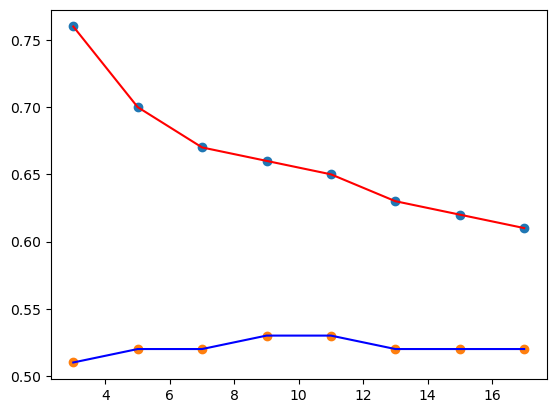

In [64]:
#visualization of different training and test accuracies with k values from 3 to 17
import matplotlib.pyplot as plt
plt.scatter(range(3, 18, 2),training_accuracy_list)
plt.plot(range(3, 18, 2),training_accuracy_list,color='red')
plt.scatter(range(3, 18, 2),test_accuracy_list)
plt.plot(range(3, 18, 2),test_accuracy_list,color='blue')
plt.show()

In [65]:
#CLASSIFICATION REPORT
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.56      0.58      0.57       198
           1       0.52      0.50      0.51       183

    accuracy                           0.54       381
   macro avg       0.54      0.54      0.54       381
weighted avg       0.54      0.54      0.54       381



## **MODEL 3 - SVM CLASSIFIER**

In [66]:
#fitting the model ----> Basic SVM
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

svm_model = SVC(kernel='linear', C=1.0, gamma='scale')
svm_model.fit(X_train, Y_train)

SVC(kernel='linear')

In [67]:
# predictions and evaluation
Y_train_pred = svm_model.predict(X_train)
Y_test_pred = svm_model.predict(X_test)

train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Training Accuracy:", np.round(train_accuracy,2))
print("Testing Accuracy:", np.round(test_accuracy,2))

Training Accuracy: 0.54
Testing Accuracy: 0.54


In [68]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.53      0.44      0.48       184
           1       0.55      0.63      0.59       197

    accuracy                           0.54       381
   macro avg       0.54      0.54      0.53       381
weighted avg       0.54      0.54      0.54       381



In [69]:
# cross validation ---> SVM-linear
#------------------------------------------------------------------

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

training_acc = []
test_acc = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.3, random_state=i)
    model = SVC(C=1.0,kernel='linear',gamma='scale')
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validation training accuracy: ",np.round(np.mean(training_acc),2))
print("Cross validation test accuracy: ",np.round(np.mean(test_acc),2))

Cross validation training accuracy:  0.54
Cross validation test accuracy:  0.54


In [70]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_test_pred))
from sklearn.metrics import precision_score

              precision    recall  f1-score   support

           0       0.58      0.44      0.50       198
           1       0.52      0.64      0.57       183

    accuracy                           0.54       381
   macro avg       0.55      0.54      0.54       381
weighted avg       0.55      0.54      0.54       381



In [71]:
# cross validation  --> SVM-polynomial
#------------------------------------------------------------------

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

training_acc = []
test_acc = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.3, random_state=i)
    model = SVC(degree=4,kernel='poly',gamma='scale')
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validatin training accuracy: ",np.round(np.mean(training_acc),2))
print("Cross validatin test accuracy: ",np.round(np.mean(test_acc),2))

Cross validatin training accuracy:  0.59
Cross validatin test accuracy:  0.53


In [72]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.55      0.64      0.59       198
           1       0.53      0.44      0.48       183

    accuracy                           0.54       381
   macro avg       0.54      0.54      0.53       381
weighted avg       0.54      0.54      0.54       381



In [73]:
# cross validation  --> SVM-radialbasis function
#------------------------------------------------------------------

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

training_acc = []
test_acc = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.3, random_state=i)
    model = SVC(kernel='rbf',gamma='scale')
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validatin training accuracy: ",np.round(np.mean(training_acc),2))
print("Cross validatin test accuracy: ",np.round(np.mean(test_acc),2))

Cross validatin training accuracy:  0.57
Cross validatin test accuracy:  0.53


In [74]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.54      0.57      0.55       198
           1       0.50      0.47      0.49       183

    accuracy                           0.52       381
   macro avg       0.52      0.52      0.52       381
weighted avg       0.52      0.52      0.52       381



## **MODEL 4 - DECISION TREE CLASSIFIER**

In [75]:
# Model Fitting

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Create a DecisionTreeClassifier model
model = DecisionTreeClassifier()

# Fit the model to the training data
model.fit(X_train, Y_train)

# Calculate the training accuracy
train_accuracy = model.score(X_train, Y_train)
print("Training Accuracy:", train_accuracy)

# Calculate the test accuracy
test_accuracy = model.score(X_test, Y_test)
print("Test Accuracy:", test_accuracy)

print("variance", np.round(np.mean(train_accuracy)-np.mean(test_accuracy),2))

Training Accuracy: 1.0
Test Accuracy: 0.5459317585301837
variance 0.45


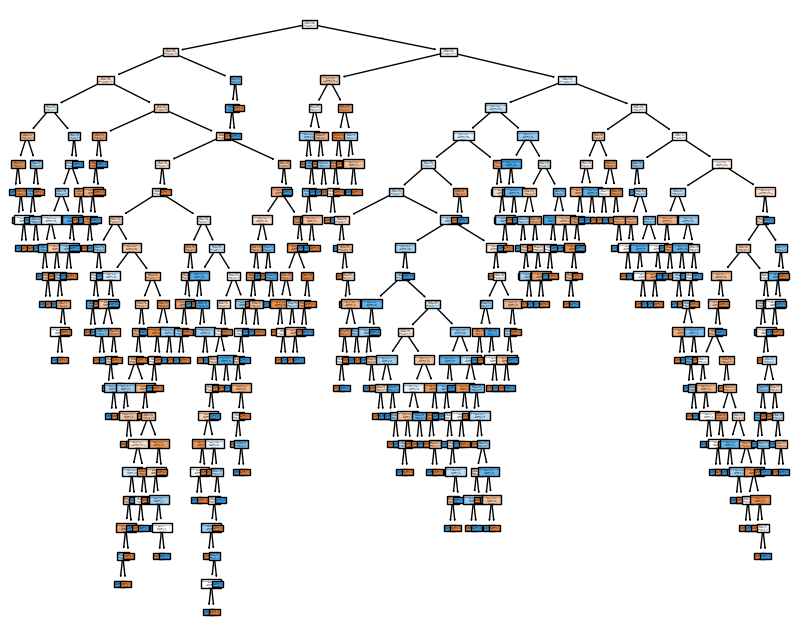

In [76]:
# visualizing the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np

# Get unique class values from your target variable
unique_classes = np.unique(Y)

# Generate class names based on the number of unique classes
class_names = [str(cls) for cls in unique_classes]

plt.figure(figsize=(10, 8))
plot_tree(model, feature_names=X.columns, class_names=class_names, filled=True)
plt.show()

In [77]:
# Get the number of nodes
n_nodes = model.tree_.node_count
print("Number of nodes:", n_nodes)

# Get the depth of the tree
depth = model.tree_.max_depth
print("Depth of the tree:", depth)

Number of nodes: 555
Depth of the tree: 21


In [78]:
# cross validation
#------------------------------------------------------------------
from sklearn.metrics import accuracy_score


training_acc = []
test_acc = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.3, random_state=i)
    model = DecisionTreeClassifier()
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validatin training accuracy: ",np.round(np.mean(training_acc),2))
print("Cross validatin test accuracy: ",np.round(np.mean(test_acc),2))
print("variance", np.round(np.mean(training_acc)-np.mean(test_acc),2))

Cross validatin training accuracy:  1.0
Cross validatin test accuracy:  0.51
variance 0.49


In [79]:
# cross validation (with different depth)
#------------------------------------------------------------------
from sklearn.metrics import accuracy_score


training_acc = []
test_acc = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.3, random_state=i)
    model = DecisionTreeClassifier(max_depth=18)
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validatin training accuracy: ",np.round(np.mean(training_acc),2))
print("Cross validatin test accuracy: ",np.round(np.mean(test_acc),2))
print("variance", np.round(np.mean(training_acc)-np.mean(test_acc),2))

Cross validatin training accuracy:  0.95
Cross validatin test accuracy:  0.51
variance 0.44


In [80]:
# cross validation (with different depth)
#------------------------------------------------------------------
from sklearn.metrics import accuracy_score


training_acc = []
test_acc = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.3, random_state=i)
    model = DecisionTreeClassifier(max_depth=12)
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validatin training accuracy: ",np.round(np.mean(training_acc),2))
print("Cross validatin test accuracy: ",np.round(np.mean(test_acc),2))
print("variance", np.round(np.mean(training_acc)-np.mean(test_acc),2))

Cross validatin training accuracy:  0.82
Cross validatin test accuracy:  0.51
variance 0.31


In [81]:
# cross validation (with different depth)
#------------------------------------------------------------------
from sklearn.metrics import accuracy_score


training_acc = []
test_acc = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.3, random_state=i)
    model = DecisionTreeClassifier(max_depth=9)
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validatin training accuracy: ",np.round(np.mean(training_acc),2))
print("Cross validatin test accuracy: ",np.round(np.mean(test_acc),2))
print("variance", np.round(np.mean(training_acc)-np.mean(test_acc),2))

Cross validatin training accuracy:  0.72
Cross validatin test accuracy:  0.52
variance 0.2


In [82]:
# cross validation (with different depth)
#------------------------------------------------------------------
from sklearn.metrics import accuracy_score


training_acc = []
test_acc = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.3, random_state=i)
    model = DecisionTreeClassifier(max_depth=6)
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validatin training accuracy: ",np.round(np.mean(training_acc),2))
print("Cross validatin test accuracy: ",np.round(np.mean(test_acc),2))
print("variance", np.round(np.mean(training_acc)-np.mean(test_acc),2))

Cross validatin training accuracy:  0.63
Cross validatin test accuracy:  0.52
variance 0.11


In [83]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.58      0.43      0.49       198
           1       0.52      0.67      0.58       183

    accuracy                           0.54       381
   macro avg       0.55      0.55      0.54       381
weighted avg       0.55      0.54      0.54       381



## **MODEL 5 - RANDOM FOREST CLASSIFIER**

In [84]:
## RANDOM FOREST
#------------------------------------------------------------------

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_samples=0.8,
                        max_features=0.9, max_depth=6,
                        n_estimators = 100, random_state=100)

# cross validation
from sklearn.metrics import accuracy_score
training_acc = []
test_acc = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.3, random_state=i)
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("RF-CV-training accuracy: ",np.round(np.mean(training_acc),2))
print("RF-CV-test accuracy: ",np.round(np.mean(test_acc),2))
print("variance", np.round(np.mean(training_acc)-np.mean(test_acc),2))

RF-CV-training accuracy:  0.81
RF-CV-test accuracy:  0.52
variance 0.29


In [85]:
# classification report (RANDOM FOREST)

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.57      0.59      0.58       198
           1       0.54      0.52      0.53       183

    accuracy                           0.56       381
   macro avg       0.56      0.56      0.56       381
weighted avg       0.56      0.56      0.56       381



## **MODEL 6 - BOOSTING CLASSIFIER**

### GRADIENTBOOSTING CLASSIFIER

In [86]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

training_acc = []
test_acc = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.3, random_state=i)
    model = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_features=0.9,max_depth=6)
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("GBC-CV-training accuracy: ",np.round(np.mean(training_acc),2))
print("GBC-CV-test accuracy: ",np.round(np.mean(test_acc),2))
print("variance", np.round(np.mean(training_acc)-np.mean(test_acc),2))

GBC-CV-training accuracy:  0.99
GBC-CV-test accuracy:  0.52
variance 0.47


In [87]:
# classification report (GRADIENTBOOSTING)

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57       198
           1       0.54      0.54      0.54       183

    accuracy                           0.55       381
   macro avg       0.55      0.55      0.55       381
weighted avg       0.55      0.55      0.55       381



###  ADABOOSTING CLASSIFIER

In [94]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

training_acc = []
test_acc = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.3, random_state=i)
    model = AdaBoostClassifier(n_estimators=500,learning_rate=0.1)
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("ABC-CV-training accuracy: ",np.round(np.mean(training_acc),2))
print("ABC-CV-test accuracy: ",np.round(np.mean(test_acc),2))
print("variance", np.round(np.mean(training_acc)-np.mean(test_acc),2))

ABC-CV-training accuracy:  0.64
ABC-CV-test accuracy:  0.53
variance 0.12


In [95]:
# classification report (ADABOOSTING)

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.60      0.67      0.63       198
           1       0.59      0.52      0.55       183

    accuracy                           0.60       381
   macro avg       0.60      0.60      0.59       381
weighted avg       0.60      0.60      0.60       381



In [96]:
# Save the trained model (ADA BOOST)
joblib.dump(model, "ada_boost_model.pkl")
print("Model saved as ada_boost_model.pkl")

Model saved as ada_boost_model.pkl


### XGBOOST- CLASSIFIER


In [90]:

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

training_acc = []
test_acc = []

# cross validation
for i in range(1,101):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.3, random_state=i)
    xgmodel = XGBClassifier(n_estimators=500,learning_rate=0.1,reg_lambda=50,gamma=25)
    xgmodel.fit(X_train,Y_train)
    Y_pred_train = xgmodel.predict(X_train)
    Y_pred_test = xgmodel.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("XGB-CV-training accuracy: ",np.round(np.mean(training_acc),2))
print("XGB-CV-test accuracy: ",np.round(np.mean(test_acc),2))
print("variance", np.round(np.mean(training_acc)-np.mean(test_acc),2))

XGB-CV-training accuracy:  0.51
XGB-CV-test accuracy:  0.5
variance 0.01


In [91]:
# classification report (XGBOOST CLASSIFIER)

from sklearn.metrics import classification_report
print('classification report (XGBOOST CLASSIFIER)')
print(classification_report(Y_test, Y_pred_test))

classification report (XGBOOST CLASSIFIER)
              precision    recall  f1-score   support

           0       0.52      1.00      0.68       198
           1       0.00      0.00      0.00       183

    accuracy                           0.52       381
   macro avg       0.26      0.50      0.34       381
weighted avg       0.27      0.52      0.36       381



In [92]:
df

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,0,0.0,1.0,0.0,50.000000,2367.86,Severe,4497.19,1,3221.74,Third-Party,Clean
1,1,1.0,0.0,0.0,18.000000,3746.41,Minor,6216.38,1,6166.17,Comprehensive,Clean
2,1,0.0,1.0,0.0,5.000000,14282.43,Severe,17978.55,0,13804.61,Comprehensive,Minor Offenses
3,0,0.0,1.0,1.0,31.000000,519.12,Severe,753.54,1,596.25,Comprehensive,Clean
4,1,0.0,1.0,0.0,30.000000,1354.31,Minor,2167.42,0,1714.83,Comprehensive,Clean
...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,28.587591,11749.94,Moderate,14992.27,0,13533.51,Comprehensive,Clean
1336,0,1.0,1.0,0.0,46.000000,776.62,Moderate,1438.79,0,1178.05,Third-Party,Major Offenses
1337,1,1.0,1.0,0.0,39.000000,13261.20,Severe,18106.45,1,16782.44,Third-Party,Minor Offenses
1338,0,1.0,0.0,0.0,8.000000,9919.60,Minor,17119.15,1,14315.98,Third-Party,Clean


In [97]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
import numpy as np

# Assuming X and Y are already defined
training_acc = []
test_acc = []

for i in range(1, 101):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=i)
    model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_features=0.9, max_depth=6)
    model.fit(X_train, Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    training_acc.append(accuracy_score(Y_train, Y_pred_train))
    test_acc.append(accuracy_score(Y_test, Y_pred_test))

print("GBC-CV-training accuracy:", np.round(np.mean(training_acc), 2))
print("GBC-CV-test accuracy:", np.round(np.mean(test_acc), 2))
print("Variance:", np.round(np.mean(training_acc) - np.mean(test_acc), 2))


GBC-CV-training accuracy: 0.99
GBC-CV-test accuracy: 0.51
Variance: 0.48
